In [16]:
import pandas as pd
import numpy as np
# %load_ext nb_black 

# library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")


# import Regex, string and unicodedata.
import re, string, unicodedata                          

# import contractions library.
!pip install contractions

import contractions                                     

# import BeautifulSoup.
from bs4 import BeautifulSoup                           

# import Natural Language Tool-Kit.
import nltk                                            

# download Stopwords.
nltk.download('stopwords')                              
nltk.download('punkt')
nltk.download('wordnet')

# import stopwords.
from nltk.corpus import stopwords                       

# import Tokenizer.
from nltk.tokenize import word_tokenize, sent_tokenize  

# library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import wordcloud
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud

# remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to get diferent metric scores
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    confusion_matrix,classification_report,
    f1_score,
    precision_score,
    precision_recall_fscore_support
)

# import vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# import rfc and cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# import word prepocessors
from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer, WordNetLemmatizer

     ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
     ----- ------------------------------- 41.0/289.9 kB 991.0 kB/s eta 0:00:01
     ------------ -------------------------- 92.2/289.9 kB 1.3 MB/s eta 0:00:01
     -------------------------- ----------- 204.8/289.9 kB 1.6 MB/s eta 0:00:01
     -------------------------------------  286.7/289.9 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 289.9/289.9 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...


ModuleNotFoundError: No module named 'sklearn'

In [18]:
df =pd.read_csv('Tweets.csv')
texts = [[word.lower() for word in text.split()] for text in df]
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [19]:
df.shape

(14640, 15)

In [20]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## Observations:

There are 15 columns in the dataset. Half of the columns have null values. Considering both dependent and independent variables not having any null values, we will not do any null value processing. Most columns in the dataset are of object type. airline_sentiment is our dependent / target variable. text column is our independent variable that we will use for analysis. All other columns will be dropped at a later stage.

In [21]:
#checking null values in our data
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [23]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ----- ------------------------------- 41.0/293.3 kB 653.6 kB/s eta 0:00:01
     -------------- ----------------------- 112.6/293.3 kB 1.3 MB/s eta 0:00:01
     ------------------ ------------------- 143.4/293.3 kB 1.4 MB/s eta 0:00:01
     --------------------------------- ---- 256.0/293.3 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


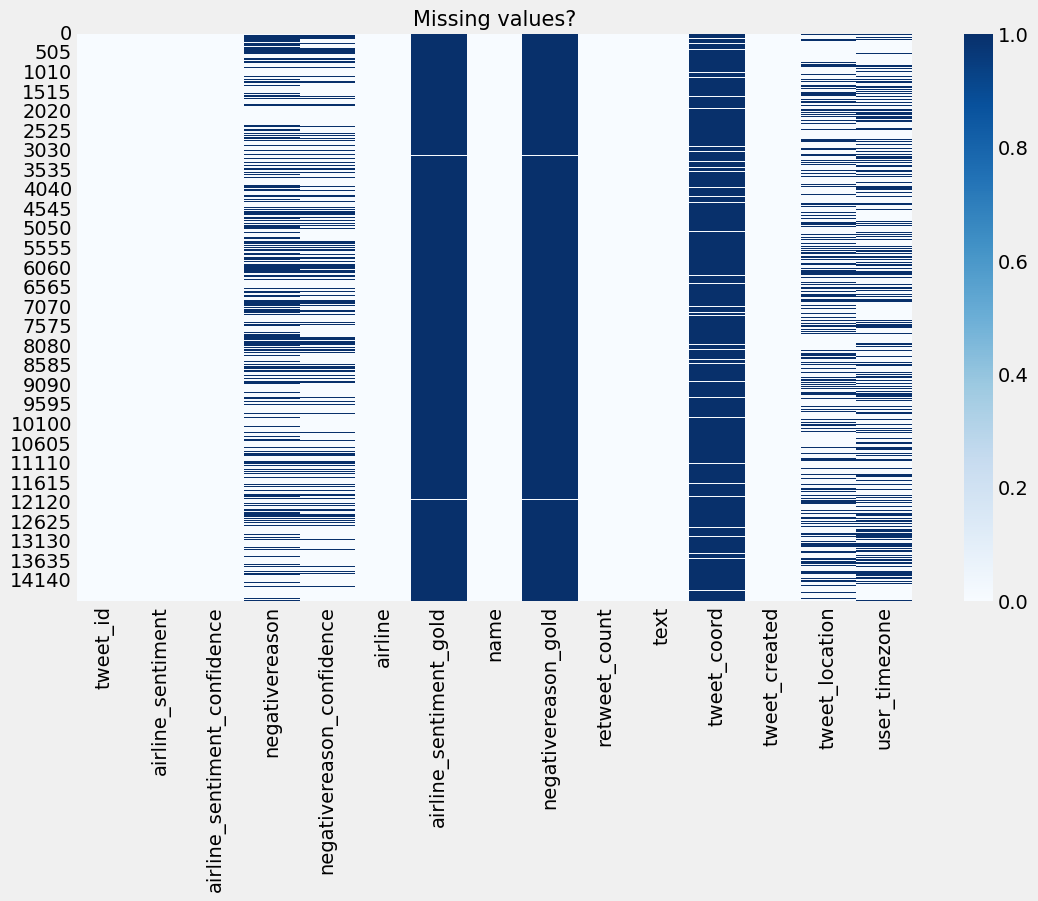

In [24]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

Interestingly, the only non-null values of the _gold columns seems to be the same entries for the most part. Meanwhile, there is some but not total overlap between location and timezone in terms of missing value

In [25]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

*airline_sentiment_gold*, *negativereason_gold* have more than 99% missing data And *tweet_coord* have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information.

In [28]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [29]:
freq = df.groupby('negativereason').size()

In [30]:
freq

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
dtype: int64

we cant fill it will affect in bad way for example we have positive reviwe and we fill the values with mode that means with Customer Service Issue it is missmatch and can be affect on train model so we keep the data as it is.

## Check for duplicates

In [32]:
# print the data set information as number of rows and columns
print(f"There are {df.duplicated().sum()} duplicate records in the datset.")  # f-string

There are 39 duplicate records in the datset.


## Drop duplicates

In [34]:
# use drop_duplicates
df.drop_duplicates(inplace = True)
# print the data set information as number of rows and columns
print(f"There are {df.duplicated().sum()} duplicate records in the datset.")  # f-string

There are 0 duplicate records in the datset.


## Check the sample data

In [36]:
# setting the random seed via np.random.seed to get the same random results every time
np.random.seed(1)

# also look at random 10 sample rows
df.sample(n=10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
9754,569682192332234752,negative,1.0000,longlines,0.6737,US Airways,RyanEthanBeard,0,@USAirways in line for 90 min after mechanical...,2015-02-22 18:16:33 -0800,NaN,NaN
3963,567907430069329920,positive,0.6367,NaN,NaN,United,lynn_with_an_A,0,@united :take note of this great example of @J...,2015-02-17 20:44:17 -0800,"Brooklyn, NY",Quito
14553,569600462661554177,negative,1.0000,Customer Service Issue,0.6887,American,otisday,0,"@AmericanAir @tennetexan Too bad there's only,...",2015-02-22 12:51:47 -0800,Pekin,Eastern Time (US & Canada)
1522,569683734951170048,negative,1.0000,Customer Service Issue,1.0000,United,almaaa08,0,@united resolved and im sick and tired of wait...,2015-02-22 18:22:41 -0800,NaN,Eastern Time (US & Canada)
1936,569514001450672128,negative,1.0000,Customer Service Issue,1.0000,United,roryfreeman87,0,@united they wouldn't let me on. Real nice of ...,2015-02-22 07:08:13 -0800,california,Central Time (US & Canada)
9901,569623156337586177,negative,1.0000,Lost Luggage,1.0000,US Airways,Brendanhwalters,0,"@USAirways please help! No bags, no way to get...",2015-02-22 14:21:58 -0800,NYC,NaN
4872,569671596744380416,positive,1.0000,NaN,NaN,Southwest,MNTmoney91,0,@SouthwestAir constantly providing wonderful v...,2015-02-22 17:34:27 -0800,MINNESOTA,Eastern Time (US & Canada)
13537,569838466697175040,negative,1.0000,Customer Service Issue,1.0000,American,thelyandre,0,@AmericanAir. It's been 5 hours and still no c...,2015-02-23 04:37:32 -0800,"Brooklyn, NY",NaN
9531,569890152832749568,negative,1.0000,Late Flight,1.0000,US Airways,steve_muns,0,@USAirways or how about power outlets at your ...,2015-02-23 08:02:55 -0800,"Washington, DC",Eastern Time (US & Canada)
9069,570252052099678208,negative,1.0000,Customer Service Issue,1.0000,US Airways,yorkshire2002,1,@USAirways @Beamske But maybe I can be on hold...,2015-02-24 08:00:58 -0800,Kentucky,Eastern Time (US & Canada)


## Describing data

In [37]:
# describe data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14601.0,5.692156e+17,7.782706e+14,5.675883e+17,5.685581e+17,5.694720e+17,5.698884e+17,5.703106e+17
airline_sentiment_confidence,14601.0,8.999022e-01,1.629654e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10501.0,6.375749e-01,3.303735e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
retweet_count,14601.0,8.280255e-02,7.467231e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


## EDA

## Check unique value

In [40]:
# Unique values of sentiment
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

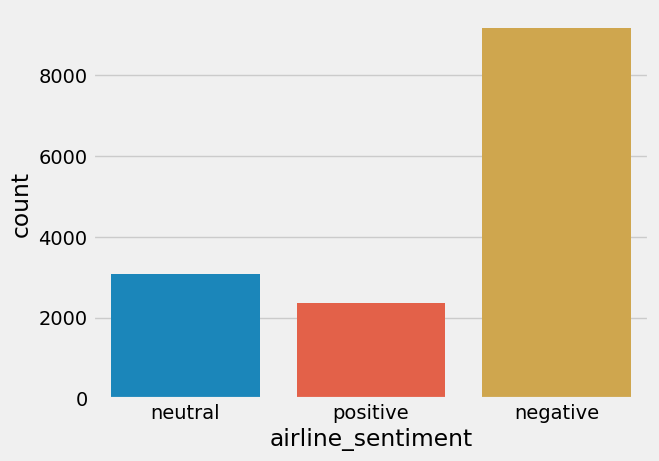

In [42]:
# Unique values of sentiment plot

ax = sns.countplot(x="airline_sentiment", data=df)

Positive and neutral tweets are almost equal.

Negative tweets are more than double of neutral or positive sentiments.

## Stacked par chart to show the distribution of reviews per company

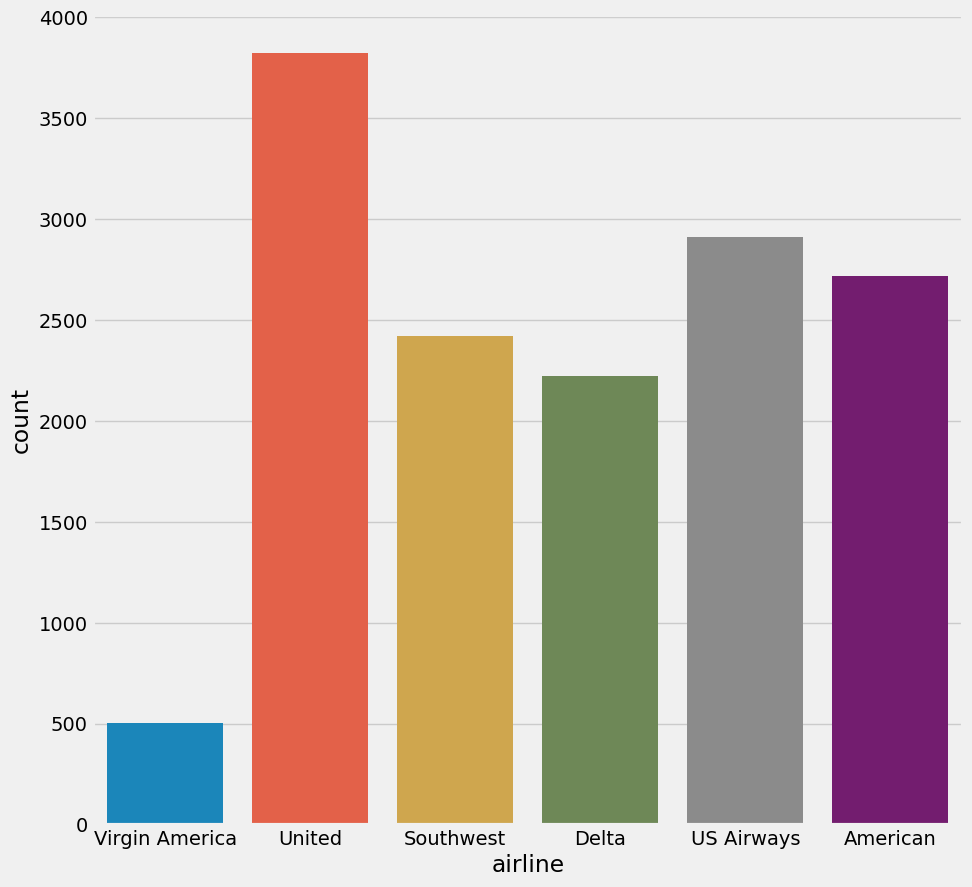

In [45]:
# Unique values of airline

plt.figure(figsize=(10,10))
ax = sns.countplot(x="airline", data=df)

## Dropng the neutral sentiments

In [51]:
## droping
df.drop(df.loc[df['airline_sentiment']=='neutral'].index, inplace=True)

## Vectorization process

In [54]:
data = df[["airline_sentiment", "text"]]
data.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [55]:
X = df["text"]
y = df["airline_sentiment"]

In [57]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/04/b8/947f40706ee2e316fd1a191688f690c4c2b351c2d043fe9deb9b7940e36e/scipy-1.11.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     -------------------- ------------------- 30.7/59.1 kB ? eta -:--:--
     -------------------------------- ----- 51.2/59.1 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 59.1/59.1 kB 520.3 kB/s eta 0:00:00
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0

In [58]:
from sklearn.model_selection import train_test_split
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [60]:
tfidf = TfidfVectorizer(stop_words="english")

In [61]:
tfidf.fit(Xtrain)

TfidfVectorizer(stop_words='english')

In [63]:
print(tfidf.vocabulary_)

{'jetblue': 5633, 'did': 3478, 'idea': 5246, 'offered': 7007, 'pay': 7303, 'tix': 9682, 'airport': 1441, 'bc': 1996, 'told': 9717, 'reservation': 8178, 'didn': 3479, '2275': 394, 'pp': 7562, 'united': 10134, 'guys': 4880, 'suck': 9273, 'respond': 8195, 'friend': 4543, 'lisapal': 6047, 'directly': 3509, 'southwestair': 8993, 'prove': 7740, 'cuz': 3226, 'southwest': 8992, 'people': 7334, 'don': 3654, 'know': 5828, 'schedule': 8525, 'ticket': 9644, 'issued': 5545, 'whilst': 10610, 'delivering': 3377, 'customers': 3210, 'usairways': 10266, 'pilot': 7421, 'flight': 4354, '729': 997, 'departure': 3405, 'amp': 1545, 'broken': 2303, 'computer': 2933, 'time': 9662, 'flying': 4428, 'alwayslate': 1510, 'americanair': 1528, 'point': 7507, 'pic': 7404, 'reps': 8152, 'struggle': 9231, 'merger': 6438, 'imagine': 5284, 'public': 7765, 'http': 5190, 'hqdb5iruvg': 5181, 'thanks': 9552, 'dm': 3619, 'rescheduling': 8171, 'unfortunately': 10121, 'operations': 7076, 'process': 7682, 'lax': 5921, 'chaos': 26

In [65]:
data[data["airline_sentiment"]=="negative"]["text"]

3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
15           @VirginAmerica SFO-PDX schedule is still MIA.
17       @VirginAmerica  I flew from NYC to SFO last we...
                               ...                        
14631    @AmericanAir thx for nothing on getting us out...
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 9157, dtype: object

In [73]:
# import wordcloud
!pip install wordcloud

import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Wordcloud for positive reasons

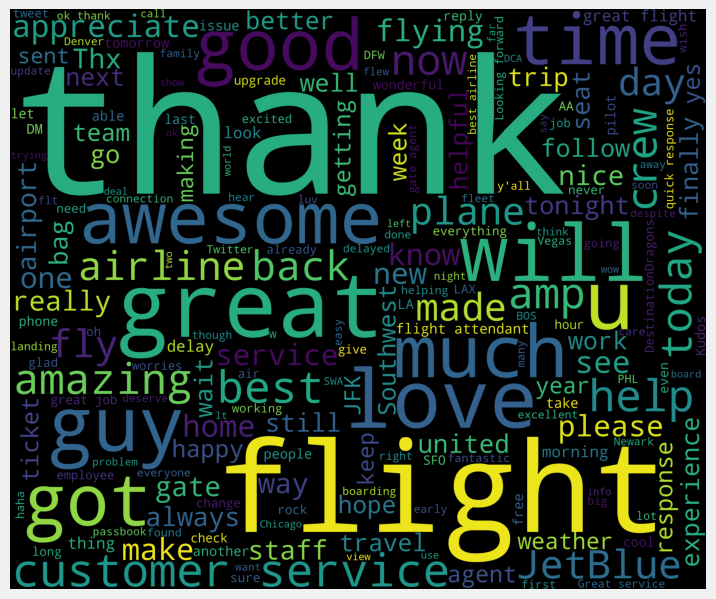

In [75]:
##positive wordcloud
new_df=data[data['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word and not word.startswith('@') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',width=3000,height=2500).generate(cleaned_word)
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Wordcloud for negative reasons

(-0.5, 2999.5, 2499.5, -0.5)

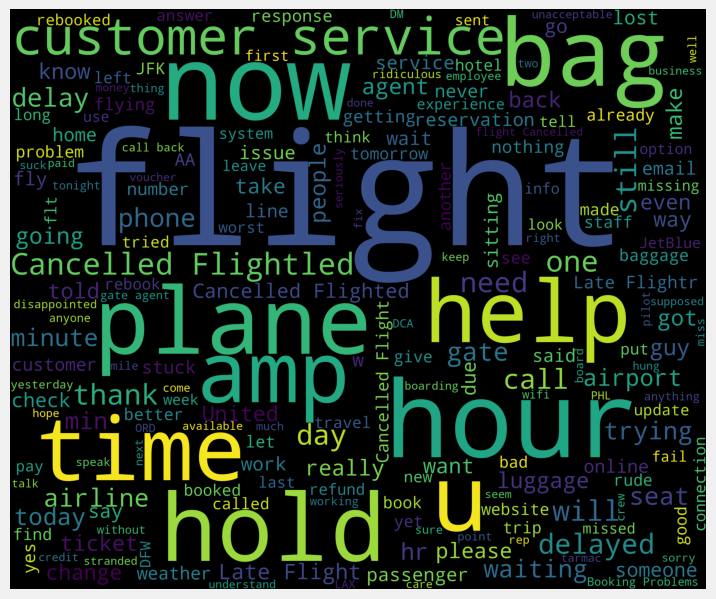

In [76]:
##negative wordcloud
new_df=data[data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word and not word.startswith('@') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',width=3000,height=2500).generate(cleaned_word)
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')

## Dropng the rows with neutral sentiments

In [79]:
data.drop(data.loc[data['airline_sentiment']=='neutral'].index, inplace=True)

## Label encoding on airline_sentiment

In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['Airline_Sentiment_Encoded'] = le.transform(data['airline_sentiment'])
data.head()

,airline_sentiment,text,Airline_Sentiment_Encoded
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


## Pre-processing tweet text data

In [84]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [86]:
nltk.download('stopwords')
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11510 entries, 1 to 14638
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   airline_sentiment          11510 non-null  object
 1   text                       11510 non-null  object
 2   Airline_Sentiment_Encoded  11510 non-null  int32 
 3   clean_tweet                11510 non-null  object
dtypes: int32(1), object(3)
memory usage: 404.6+ KB


## Vectorization

In [90]:
x = data.clean_tweet
y = data.airline_sentiment

print(len(x), len(y))

11510 11510


## Data split in standard ratio 80,20 ratio

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8632 8632
2878 2878


In [93]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [94]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [95]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

## Model building

In [97]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = model.predict(x_test_dtm)

In [100]:
#accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.9075747046560111

In [101]:
#building confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[2179,  122],
       [ 144,  433]], dtype=int64)

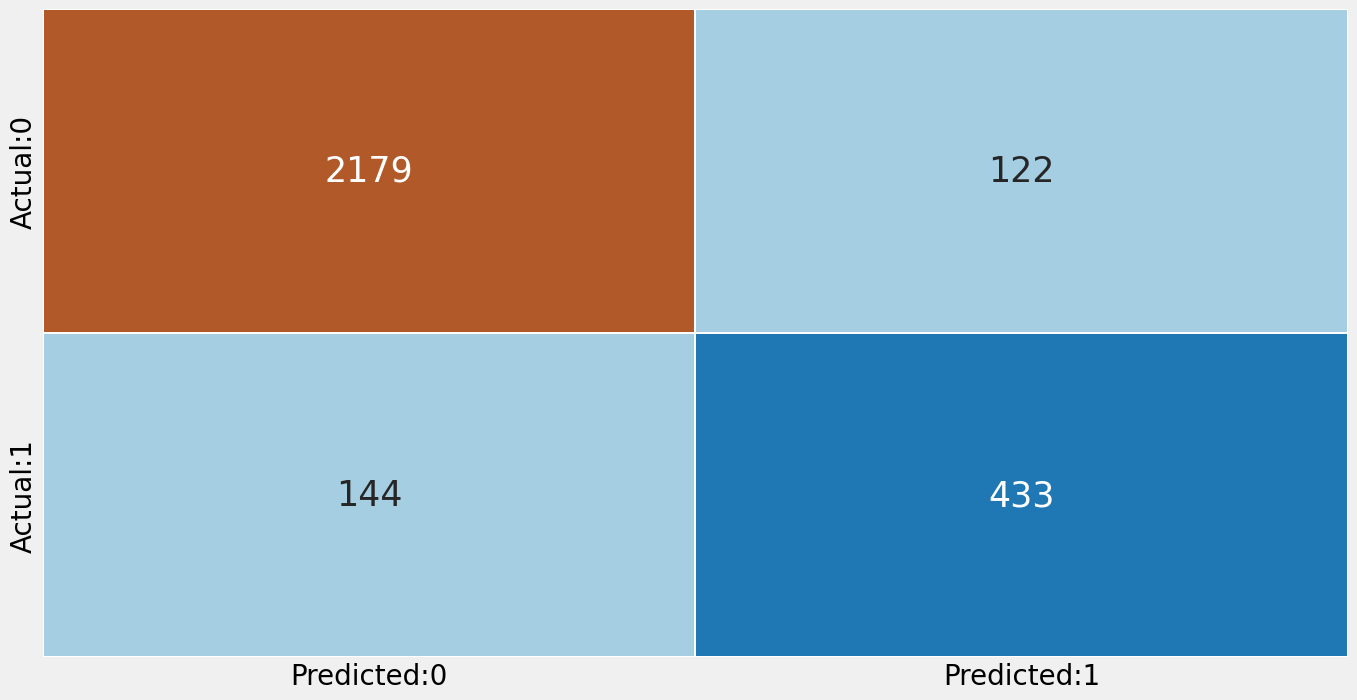

In [102]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.94      0.95      0.94      2301
    positive       0.78      0.75      0.77       577

    accuracy                           0.91      2878
   macro avg       0.86      0.85      0.85      2878
weighted avg       0.91      0.91      0.91      2878

